In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

/Users/jaidevd/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/jaidevd/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv("judges.csv", parse_dates=['doa', 'dor'])
df.sort_values("doa", inplace=True)
df.head()

,cj,doa,dor,gender,name
186,True,1950-01-26,1951-06-11,M,Hon’ble Mr. Justice Harilal Jekisundas Kania
187,True,1950-01-26,1954-03-01,M,Hon’ble Mr. Justice M. Patanjali Sastri
190,True,1950-01-26,1959-09-30,M,Hon’ble Mr. Justice Sudhi Ranjan Das
28,False,1950-01-26,1951-09-18,M,Hon’ble Mr. Justice Sir Saiyid Fazl Ali
189,True,1950-01-26,1956-01-31,M,Hon’ble Mr. Justice Bijan Kumar Mukherjea


In [22]:
df['tenure_days'] = (df['dor'] - df['doa']).apply(lambda x: x.days) + 1
df['tenure_years'] = df['tenure_days'] / 365
df['year'] = df.doa.apply(lambda x: x.year)
df['decade'] = (year // 10) * 10

In [23]:
males = df[df.gender == "M"]
females = df[df.gender == "F"]

In [10]:
males.tenure_days.mean() / 365

5.501136433441857

In [11]:
females.tenure_days.mean()

1645.0

In [12]:
men_min = males.groupby('year').agg(np.min)
men_max = males.groupby('year').agg(np.max)
men_mean = males.groupby('year').agg(np.mean)

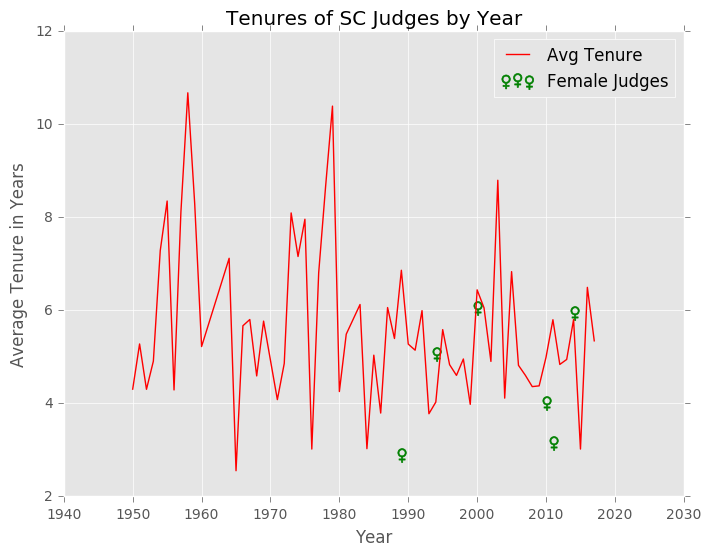

In [44]:
fig = plt.figure(figsize=(8, 6))
fig.add_subplot(111)
#plt.plot(men_min.index, men_min['tenure_days'].values, "g-", label="Minimum")
#plt.scatter(men_min.index, men_min['tenure_days'].values, c="g", marker="o")
#plt.plot(men_max.index, men_max['tenure_days'].values, "r-", label="Maximum")
#plt.scatter(men_max.index, men_max['tenure_days'].values, c="r", marker="o")
plt.plot(men_mean.index, men_mean['tenure_days'].values / 365, "r-", label="Avg Tenure")
#plt.scatter(men_mean.index, men_mean['tenure_days'].values, c="k", marker="o")
plt.scatter(females['year'].values, females['tenure_days'].values / 365,
            marker="$\u2640$", s=100, label="Female Judges", color="g")
plt.xlabel("Year")
plt.ylabel("Average Tenure in Years")
plt.title("Tenures of SC Judges by Year")
plt.legend(loc="best")

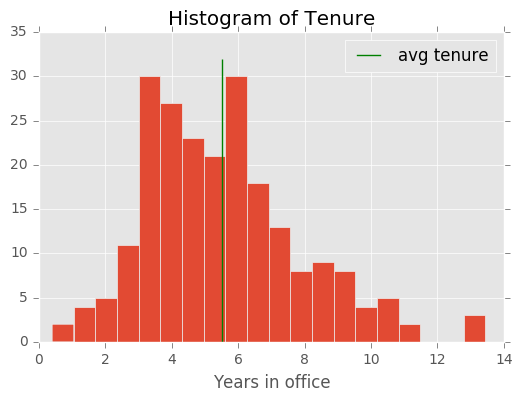

In [38]:
ax = males.tenure_years.hist(bins=20)
ax.vlines(males.tenure_years.mean(), 0, 32., label="avg tenure", colors="g")
ax.set_xlabel("Years in office")
ax.set_title("Histogram of Tenure")
ax.legend()

In [32]:
females.head()

,cj,doa,dor,gender,name,tenure_days,decade,year,tenure_years
98,False,1989-06-10,1992-04-29,F,Hon’ble Mr. Justice M. Fathima Beevi,1055,1980,1989,2.890411
115,False,1994-08-11,1999-08-27,F,Hon’ble Ms. Justice Sujata V. Manohar,1843,1990,1994,5.049315
133,False,2000-01-28,2006-02-06,F,Hon’ble Mrs. Justice Ruma Pal,2202,2000,2000,6.032877
171,False,2010-04-30,2014-04-27,F,Hon’ble Mrs. Justice Gyan Sudha Misra,1459,2010,2010,3.997260
177,False,2011-09-13,2014-10-29,F,Hon'ble Mrs. Justice Ranjana Prakash Desai,1143,2010,2011,3.131507
